# Deriving N-Grams from Text

Based on [N-Gram-Based Text Categorization: Categorizing Text With Python by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/20/n-gram-based-text-categorization-categorizing-text-with-python/)

What are n-grams? See [here](http://cloudmark.github.io/Language-Detection/).


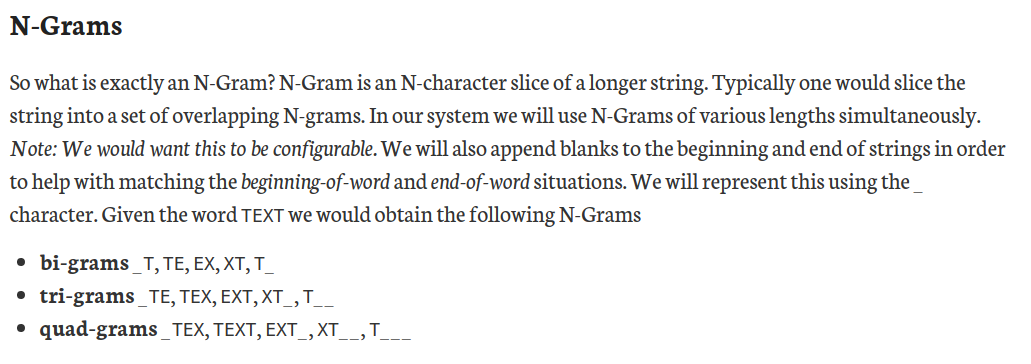

In [14]:
from IPython.display import Image
Image(filename='/tmp/netcom_dataScience_dataAnalytics/src/photos/n_grams.png') 

## 1. Tokenization

In [5]:
# Time is a great teacher, but unfortunately it kills all its pupils. 
# Letter written in November 1856, published in Pierre Citron 
# Hector Berlioz
s = "Le temps est un grand maître, dit-on, le malheur est qu'il tue ses élèves."
s = s.lower()

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
s_tokenized = tokenizer.tokenize(s)
s_tokenized

['le',
 'temps',
 'est',
 'un',
 'grand',
 'maître',
 'dit',
 'on',
 'le',
 'malheur',
 'est',
 "qu'il",
 'tue',
 'ses',
 'élèves']

In [7]:
from nltk.util import ngrams
generated_4grams = []

for word in s_tokenized:
    generated_4grams.append(list(ngrams(word, 4, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))) # n = 4.
generated_4grams

[[('_', '_', '_', 'l'),
  ('_', '_', 'l', 'e'),
  ('_', 'l', 'e', '_'),
  ('l', 'e', '_', '_'),
  ('e', '_', '_', '_')],
 [('_', '_', '_', 't'),
  ('_', '_', 't', 'e'),
  ('_', 't', 'e', 'm'),
  ('t', 'e', 'm', 'p'),
  ('e', 'm', 'p', 's'),
  ('m', 'p', 's', '_'),
  ('p', 's', '_', '_'),
  ('s', '_', '_', '_')],
 [('_', '_', '_', 'e'),
  ('_', '_', 'e', 's'),
  ('_', 'e', 's', 't'),
  ('e', 's', 't', '_'),
  ('s', 't', '_', '_'),
  ('t', '_', '_', '_')],
 [('_', '_', '_', 'u'),
  ('_', '_', 'u', 'n'),
  ('_', 'u', 'n', '_'),
  ('u', 'n', '_', '_'),
  ('n', '_', '_', '_')],
 [('_', '_', '_', 'g'),
  ('_', '_', 'g', 'r'),
  ('_', 'g', 'r', 'a'),
  ('g', 'r', 'a', 'n'),
  ('r', 'a', 'n', 'd'),
  ('a', 'n', 'd', '_'),
  ('n', 'd', '_', '_'),
  ('d', '_', '_', '_')],
 [('_', '_', '_', 'm'),
  ('_', '_', 'm', 'a'),
  ('_', 'm', 'a', 'î'),
  ('m', 'a', 'î', 't'),
  ('a', 'î', 't', 'r'),
  ('î', 't', 'r', 'e'),
  ('t', 'r', 'e', '_'),
  ('r', 'e', '_', '_'),
  ('e', '_', '_', '_')],
 [('_', '_

It seems that `generated_4grams` needs flattening since it's supposed to be a list of 4-grams:

In [8]:
generated_4grams = [word for sublist in generated_4grams for word in sublist]
generated_4grams[:10]

[('_', '_', '_', 'l'),
 ('_', '_', 'l', 'e'),
 ('_', 'l', 'e', '_'),
 ('l', 'e', '_', '_'),
 ('e', '_', '_', '_'),
 ('_', '_', '_', 't'),
 ('_', '_', 't', 'e'),
 ('_', 't', 'e', 'm'),
 ('t', 'e', 'm', 'p'),
 ('e', 'm', 'p', 's')]

## 2. Obtaining n-grams (n = 4)

In [9]:
ng_list_4grams = generated_4grams
for idx, val in enumerate(generated_4grams):
    ng_list_4grams[idx] = ''.join(val)
ng_list_4grams

['___l',
 '__le',
 '_le_',
 'le__',
 'e___',
 '___t',
 '__te',
 '_tem',
 'temp',
 'emps',
 'mps_',
 'ps__',
 's___',
 '___e',
 '__es',
 '_est',
 'est_',
 'st__',
 't___',
 '___u',
 '__un',
 '_un_',
 'un__',
 'n___',
 '___g',
 '__gr',
 '_gra',
 'gran',
 'rand',
 'and_',
 'nd__',
 'd___',
 '___m',
 '__ma',
 '_maî',
 'maît',
 'aîtr',
 'ître',
 'tre_',
 're__',
 'e___',
 '___d',
 '__di',
 '_dit',
 'dit_',
 'it__',
 't___',
 '___o',
 '__on',
 '_on_',
 'on__',
 'n___',
 '___l',
 '__le',
 '_le_',
 'le__',
 'e___',
 '___m',
 '__ma',
 '_mal',
 'malh',
 'alhe',
 'lheu',
 'heur',
 'eur_',
 'ur__',
 'r___',
 '___e',
 '__es',
 '_est',
 'est_',
 'st__',
 't___',
 '___q',
 '__qu',
 "_qu'",
 "qu'i",
 "u'il",
 "'il_",
 'il__',
 'l___',
 '___t',
 '__tu',
 '_tue',
 'tue_',
 'ue__',
 'e___',
 '___s',
 '__se',
 '_ses',
 'ses_',
 'es__',
 's___',
 '___é',
 '__él',
 '_élè',
 'élèv',
 'lève',
 'èves',
 'ves_',
 'es__',
 's___']

## 3. Sorting n-grams by frequency (n = 4)

In [10]:
# creating a set to hold unique values
freq_4grams = {}
# burying the ngrams into the stack
for ngram in ng_list_4grams:
    if ngram not in freq_4grams:
        freq_4grams.update({ngram: 1})
    else:
        #increase the count of times ngram is seen
        ngram_occurrences = freq_4grams[ngram]
        freq_4grams.update({ngram: ngram_occurrences + 1})
        
# The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. 
# For example, operator.add(x, y) is equivalent to the expression x + y.
from operator import itemgetter 
freq_4grams_sorted = sorted(freq_4grams.items(), key=itemgetter(1), reverse=True)[0:300] 
# We only keep the 300 most popular n-grams. This was suggested in the original paper written about n-grams.
freq_4grams_sorted

[('e___', 4),
 ('s___', 3),
 ('t___', 3),
 ('___l', 2),
 ('__le', 2),
 ('_le_', 2),
 ('le__', 2),
 ('___t', 2),
 ('___e', 2),
 ('__es', 2),
 ('_est', 2),
 ('est_', 2),
 ('st__', 2),
 ('n___', 2),
 ('___m', 2),
 ('__ma', 2),
 ('es__', 2),
 ('__te', 1),
 ('_tem', 1),
 ('temp', 1),
 ('emps', 1),
 ('mps_', 1),
 ('ps__', 1),
 ('___u', 1),
 ('__un', 1),
 ('_un_', 1),
 ('un__', 1),
 ('___g', 1),
 ('__gr', 1),
 ('_gra', 1),
 ('gran', 1),
 ('rand', 1),
 ('and_', 1),
 ('nd__', 1),
 ('d___', 1),
 ('_maî', 1),
 ('maît', 1),
 ('aîtr', 1),
 ('ître', 1),
 ('tre_', 1),
 ('re__', 1),
 ('___d', 1),
 ('__di', 1),
 ('_dit', 1),
 ('dit_', 1),
 ('it__', 1),
 ('___o', 1),
 ('__on', 1),
 ('_on_', 1),
 ('on__', 1),
 ('_mal', 1),
 ('malh', 1),
 ('alhe', 1),
 ('lheu', 1),
 ('heur', 1),
 ('eur_', 1),
 ('ur__', 1),
 ('r___', 1),
 ('___q', 1),
 ('__qu', 1),
 ("_qu'", 1),
 ("qu'i", 1),
 ("u'il", 1),
 ("'il_", 1),
 ('il__', 1),
 ('l___', 1),
 ('__tu', 1),
 ('_tue', 1),
 ('tue_', 1),
 ('ue__', 1),
 ('___s', 1),
 ('__s

## 4. Obtaining n-grams for multiple values of n

To get n-grams for n = 1, 2, 3 and 4 we can use:

In [17]:
# everygrams(sequence, min_len=1, max_len=-1, pad_left=False, pad_right=False, **kwargs)
#     Returns all possible ngrams generated from a sequence of items, as an iterator.
from nltk import everygrams
sent = 'a b c'.split()
list(everygrams(sent))


[('a',), ('a', 'b'), ('a', 'b', 'c'), ('b',), ('b', 'c'), ('c',)]

In [18]:
s_clean = ' '.join(s_tokenized) # For the code below we need the raw sentence as opposed to the tokens.
s_clean

"le temps est un grand maître dit on le malheur est qu'il tue ses élèves"

In [19]:
def ngram_extractor(sent):
    return [''.join(ng) for ng in everygrams(sent.replace(' ', '_ _'), 1, 4) 
            if ' ' not in ng and '\n' not in ng and ng != ('_',)]

ngram_extractor(s_clean)

['l',
 'le',
 'le_',
 'e',
 'e_',
 '_t',
 '_te',
 '_tem',
 't',
 'te',
 'tem',
 'temp',
 'e',
 'em',
 'emp',
 'emps',
 'm',
 'mp',
 'mps',
 'mps_',
 'p',
 'ps',
 'ps_',
 's',
 's_',
 '_e',
 '_es',
 '_est',
 'e',
 'es',
 'est',
 'est_',
 's',
 'st',
 'st_',
 't',
 't_',
 '_u',
 '_un',
 '_un_',
 'u',
 'un',
 'un_',
 'n',
 'n_',
 '_g',
 '_gr',
 '_gra',
 'g',
 'gr',
 'gra',
 'gran',
 'r',
 'ra',
 'ran',
 'rand',
 'a',
 'an',
 'and',
 'and_',
 'n',
 'nd',
 'nd_',
 'd',
 'd_',
 '_m',
 '_ma',
 '_maî',
 'm',
 'ma',
 'maî',
 'maît',
 'a',
 'aî',
 'aît',
 'aîtr',
 'î',
 'ît',
 'îtr',
 'ître',
 't',
 'tr',
 'tre',
 'tre_',
 'r',
 're',
 're_',
 'e',
 'e_',
 '_d',
 '_di',
 '_dit',
 'd',
 'di',
 'dit',
 'dit_',
 'i',
 'it',
 'it_',
 't',
 't_',
 '_o',
 '_on',
 '_on_',
 'o',
 'on',
 'on_',
 'n',
 'n_',
 '_l',
 '_le',
 '_le_',
 'l',
 'le',
 'le_',
 'e',
 'e_',
 '_m',
 '_ma',
 '_mal',
 'm',
 'ma',
 'mal',
 'malh',
 'a',
 'al',
 'alh',
 'alhe',
 'l',
 'lh',
 'lhe',
 'lheu',
 'h',
 'he',
 'heu',
 'heur'